In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import mean
from numpy import std
import scipy
import datetime
from scipy.optimize import minimize
%matplotlib inline
import scipy.optimize as sco
import scipy.interpolate as sci
import math
import plotly.graph_objects as go
import pandas as pd

In [2]:
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
#Plotly imports
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.templates.default = "seaborn"
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import plotly.express as px

Import the necessary libraries and name the column headers Patient_Number for the ID number, DOB as data of birth and caregiven as the care administered. The index will remain unnamed. 

In [3]:
df = pd.read_csv('data/Data_and_date_patterns_2.csv',header= None)
# df.reset_index().T.reset_index().T
headers =  [ "Patient_Number", "xxx", "Caregiven"]
df.columns = headers
df

,Patient_Number,xxx,Caregiven
0,3885897767,2009-11-20,X
1,3885897767,2010-05-24,D
2,3885897767,2011-02-15,H
3,3885897767,2014-09-20,HJ
4,3885897767,2014-09-21,H
...,...,...,...
132960,6891281111074880,2016-12-02,C
132961,6946621046879403,2017-06-08,H
132962,7822929857336149,2016-12-02,C
132963,9273693292265474,2017-06-18,C


Since the dataset is too big (for my computer) , I decided to use the first 600 entries as this can be adjusted to any number. 

In [4]:
df2 = df.head(600)
df2

,Patient_Number,xxx,Caregiven
0,3885897767,2009-11-20,X
1,3885897767,2010-05-24,D
2,3885897767,2011-02-15,H
3,3885897767,2014-09-20,HJ
4,3885897767,2014-09-21,H
...,...,...,...
595,393883694778,2013-10-05,J
596,393883694778,2014-02-14,J
597,393883694778,2014-03-14,J
598,393883694778,2014-08-01,J


The plot below uses plotly.graph_objects as go. This visual is insufficient as one cannot tell the difference between the different patient numbers
Additionally, the legend on the right is quite misleading. As a result, I decided to use plotly express as px instead. 

In [5]:

fig = go.Figure()
fig.add_trace(go.Scatter(
    name="Patient_Number",
    mode="markers+lines", x=df2["xxx"], y=df2["Caregiven"],
    marker_symbol="star",showlegend=True,
))

fig.update_traces(marker=dict(size=9,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))

fig.update_traces(hoverinfo="skip", hovertemplate=None)

fig.show()

The visual by Plotly.express is suitable as the patient numbers are individulized in the legend. Additionallly, they are interactive therefore, one can click on the patient number that should be excluded and it will disappear on the plot. 
However, due to the size of the dataset the color chart has been exhausted thus leading to a repetition of colors. 
The code was gotten from the link below:

https://plotly.com/python/discrete-color/

In [6]:
import plotly.express as px

# gapminder = px.data.gapminder().query("continent=='Oceania'")
fig = px.scatter(df2, x="xxx", y="Caregiven", color='Patient_Number')
fig.show()

This visual has a different line shape than the visual above as well as a dedicated color chart. This helps the visualization appear brighter and thus more interesting. 
The plot also has a different render mode than that above as well as more labels. 
It is my recommendation that we proceed with the plot below. 

In [7]:
import plotly.express as px
fig = px.line(df2, y="Caregiven", x="xxx", color="Patient_Number", line_group="Patient_Number",
              line_shape="spline", render_mode="svg",markers=True,
             color_discrete_sequence=px.colors.qualitative.G10,
             title="Continous Time spread of date of care administered vs Care given")

fig.show()

In [22]:
import plotly.express as px
import pandas as pd

df2["Patient_Number"] = df2["Patient_Number"].astype(str)
fig = px.scatter(df2, y="Caregiven", x="xxx", color="Patient_Number",color_discrete_sequence=px.colors.qualitative.G10,
                 title="Non-Continous Time spread of date of care administered vs Care given")
fig.show()

In [11]:
df2["Patient_Number"] = df2["Patient_Number"].astype(str)
fig = px.scatter(df2, y="Caregiven", x="xxx", color="Caregiven",color_discrete_sequence=px.colors.qualitative.G10,
                 hover_data=df2.columns,
                 title="Non-Continous Time spread of date of care administered vs Care given")
fig.show()

In [12]:
figg = px.scatter(df2,  y="Caregiven", x="xxx", hover_data=df2.columns)
figg.update_traces(
    marker=dict(
        color=((df2['Patient_Number']=='y')|(df2['Caregiven']=='F')).astype('float'),
        colorscale=[[0,'blue'],[1,'red']]
    )
)
figg.show()

## Heatmaps
https://plotly.com/python/2D-Histogram/
https://plotly.com/python/heatmaps/

In [15]:
df2["Patient_Number"] = df2["Patient_Number"].astype(str)
fig = px.scatter(df2,  y="Caregiven", x="xxx", hover_data=df2.columns, color="Patient_Number",
    size="xxx", size_max=45, log_x=True)

fig.show()

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [14]:
fig = px.density_heatmap(df2,  y="Caregiven", x="xxx", nbinsx=20, nbinsy=20, color_continuous_scale="ylgn")
fig.show()

In [13]:
fig = px.density_heatmap(df2,  y="Caregiven", x="xxx", z="Patient_Number", histfunc="avg")
fig.show()

look at this one for heatmaps 
https://towardsdatascience.com/8-visualizations-with-python-to-handle-multiple-time-series-data-19b5b2e66dd0

https://plotly.com/python/bubble-maps/

https://towardsdatascience.com/8-visualizations-with-python-to-handle-multiple-time-series-data-19b5b2e66dd0

In [15]:
df4= df2.head(50)

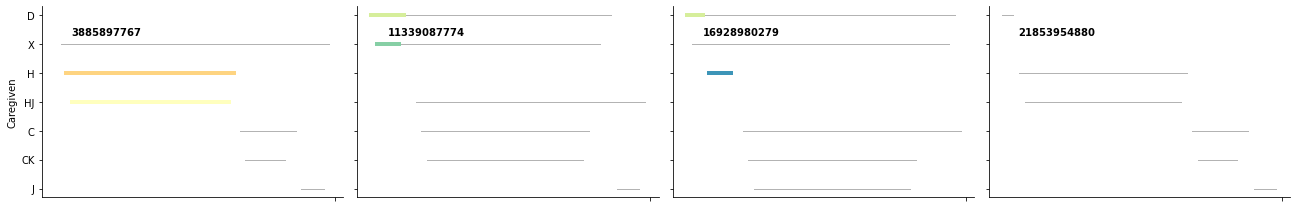

In [16]:
g = sns.relplot(data = df4, x = "xxx", y = "Caregiven",
                col = "Patient_Number", hue = "Caregiven",
                kind = "line", palette = "Spectral",   
                linewidth = 4, zorder = 5,
                col_wrap = 5, height = 3, aspect = 1.5, legend = False
               )

#add text and silhouettes
for time, ax in g.axes_dict.items():
    ax.text(.1, .85, time,
            transform = ax.transAxes, fontweight="bold"
           )
    sns.lineplot(data = df4, x = "xxx", y = "Caregiven", units="Caregiven",
                 estimator = None, color= ".7", linewidth=1, ax=ax
                )

ax.set_xticks('')
g.set_titles("")
g.set_axis_labels("", "Caregiven")
g.tight_layout()

In [16]:
df1 = df2['Caregiven'].value_counts().to_frame().reset_index()
fig = px.pie(df1, values='Caregiven', names ='index' ,title='Percentage of Caregiven over the years' , 
             color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

In [17]:
rating_between_0_to_25 = df1.loc[df1['Caregiven'] < 25]
rating_between_25_to_50 = df1[(df1['Caregiven'] >25.0) & (df1['Caregiven']<50.0)]
rating_between_50_to_75 = df1[(df1['Caregiven'] >50.0) & (df1['Caregiven']<75.0)]
rating_between_75_to_100 = df1[(df1['Caregiven'] >75.0) & (df1['Caregiven']<100.0)]

In [18]:
# def rating(shelf):
#     fig = px.scatter(shelf, x="xxx", y="Caregiven",
#                      size="index", color="Caregiven",
#                      hover_name="index", size_max=60)
#     fig.show()
# rating(rating_between_0_to_25)
# rating(rating_between_25_to_50)
# rating(rating_between_50_to_75)
# rating(rating_between_75_to_100)

In [19]:
 
import plotly.graph_objects as go

#extract color palette, the palette name can be changed
pal = list(sns.color_palette(palette='viridis', n_colors=len(list_scode)).as_hex())

months = list(reversed([str(i) for i in list(range(1,13))])) + ['12']
list_PM = [[list(df2[df2['Patient_Number']==i]['PM2.5'])[int(n)-1] for n in months] for i in list_district]

fig = go.Figure()
for pm,d,c in zip(list_PM, list_district, pal):
    fig.add_trace(go.Scatterpolar(r = pm, theta=months, fill= None,
                                  name=str(d), marker = dict(color = c)))

fig.update_layout(polar = dict(radialaxis = dict(visible = True, range=[0, 70]),
                               angularaxis = dict(rotation=90)),
                  showlegend=True, width=720, height=720,
                  font = dict(size=14))

fig.show()

NameError: name 'list_scode' is not defined

In [ ]:
fig = px.scatter(df2.query("xxx==2000"), x="Patient_Number", y="Caregiven",
                 size="Caregiven", color="Patient_Number",hover_name="Patient_Number", log_x=True, size_max=60)
fig.show()

In [20]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Scatter(
    x=df2['xxx'],
    y=df2['Caregiven'],
    mode='markers',
    marker=dict(
        color=[120, 125, 130, 135, 140, 145],
        size=[15, 30, 55, 70, 90, 110],
        showscale=True
        )
)])

fig.show()

In [21]:
import plotly.graph_objects as go
import numpy as np

fig = go.Figure(data=go.Scatter(
    x=df2['xxx'],
    y=df2['Caregiven'],
    mode='markers',
    marker=dict(
        size=16,
        color=np.random.randn(1000), #set color equal to a variable
        colorscale='Viridis', # one of plotly colorscales
        showscale=True
    )
))

fig.show()

In [ ]:
# use the scatterplot function to build the bubble map
sns.scatterplot(data=df2, x="xxx", y="Caregiven", size="Patient_Number", legend=False, sizes=(20, 2000))

# show the graph
plt.show()

In [ ]:
# set seaborn style
sns.set_style("white")

# Basic 2D density plot
sns.kdeplot(x=df2.xxx, y=df2.Caregiven)
plt.show()
 
# # Custom the color, add shade and bandwidth
# sns.kdeplot(x=df2.xxx, y=df2.Caregiven, cmap="Reds", shade=True, bw_adjust=.5)
# plt.show()

# # Add thresh parameter
# sns.kdeplot(x=df2.xxx, y=df2.Caregiven, cmap="Blues", shade=True, thresh=0)
# plt.show()

In [ ]:
fig1 = px.scatter(df2, x = df2['xxx'], y = df2['Caregiven'],
                  size = 'xxx',   color = 'Caregiven')
fig1.update_layout(
                   title = "Cereals Consumer Reports Ratings ",
                   title_font_size = 40,    
                   template = 'seaborn',
                   width = 1600, height = 1400)
fig1.update_xaxes(
                  title_text = 'xxx',
                  title_font=dict(size=30, family='Verdana',  
                                  color='purple'),
                  tickfont=dict(family='Calibri', color='black', 
                                size=25))
fig1.update_yaxes(
                  title_text = "Caregiven", range = (0,80),
                  title_font=dict(size=30, family='Verdana', 
                                  color='orange'),
                  tickfont=dict(family='Calibri', color='black', 
                                size=25))
fig1.show()

In [ ]:
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd
import math

# Load data, define hover text and bubble size
data = df2
# df_2007 = data[data['year']==2007]
# df_2007 = df_2007.sort_values(['continent', 'country'])

hover_text = []
bubble_size = []

for index, row in df2.iterrows():
    hover_text.append(('Patient Number: {Patient_Number}<br>'+
                      'Care given: {Caregiven}<br>'+
                      'Years: {xxx}<br>'.format(Patient_Number=row['Patient_Number'],
                                                Caregiven=row['Caregiven'],
                                                Years=row['xxx'],)),
    bubble_size.append(math.sqrt(row['pop']))

df2['text'] = hover_text
df2['size'] = bubble_size
sizeref = 2.*max(df2['size'])/(100**2)

# Dictionary with dataframes for each continent
caregiven = ['X', 'D', 'H', 'HJ','C','CK','J','G','B','I','K','E','EJ','A','XK','F','XD']
caredata = {care:df2.query("care == '%s'" %care)
                              for care in caregiven}

# Create figure
fig = go.Figure()

for caregiven, care in caredata.items():
    fig.add_trace(go.Scatter(
        x=care['xxx'], y=care['Caregiven'],
        name=caregiven, text=care['text'],
        marker_size=care['size'],
        ))

# Tune marker appearance and layout
fig.update_traces(mode='markers', marker=dict(sizemode='area',
                                              sizeref=sizeref, line_width=2))

fig.update_layout(
    title='Life Expectancy v. Per Capita GDP, 2007',
    xaxis=dict(
        title='GDP per capita (2000 dollars)',
        gridcolor='white',
        type='log',
        gridwidth=2,
    ),
    yaxis=dict(
        title='Life Expectancy (years)',
        gridcolor='white',
        gridwidth=2,
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
)
fig.show()

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

In [ ]:
fig = px.imshow(df2.T, color_continuous_scale='RdBu_r', origin='lower')
fig.show()